# **Flights Delays and Cancellations**

A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. As the data analyst on the team, you decide to embark on this analytical project.

The aviation industry is dynamic with various variables impacting flight operations. To ensure the relevance and applicability of your findings, you choose to focus solely on flights from the 'pnwflights2022' datasets available from the ModernDive team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport).

## Questions to asnwer

In this project, we will attempt to answer the following questions:
- What routes and airlines have the most cancelled flights?
- What airlines have the highest average delay time?

### 1. Preparing data for analysis

In [103]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the flights dataset
flights_df = pd.read_csv('flights_weather2022.csv')

After loading in our data, we will now add the `route` column to the data frame using the existing `origin` and `destination` columns. Then, we can produce a new data frame grouped by `route` to show the average delay time and cancellations per route. 

For this new data frame, I specifically choose to also include average delay time per route, even though we are not currently interested in such statistics, because if further analysis is needed, we can conveniently utlizie this data frame.

In [105]:
# Adding the route column
flights_df['route'] = flights_df['origin'] + '-' + flights_df['dest']

# Produce new data frame grouped by route
routes_delay = flights_df.groupby('route')['dep_delay'].agg('mean').reset_index()
routes_cancelled = flights_df[flights_df['dep_time'].isna()]
routes_cancels = routes_cancelled.groupby('route').size().reset_index()
routes_delay_cancels = pd.merge(routes_delay, routes_cancels, how="outer", on = 'route')
routes_delay_cancels.columns = ['route', 'avg_delay_time', 'cancelled_flights']
routes_delay_cancels['cancelled_flights']= routes_delay_cancels['cancelled_flights'].astype('Int64')

# Filling missing values with 0 for convenience for further analysis
routes_delay_cancels.fillna(0, inplace=True)

# Print the new data frame
print(routes_delay_cancels)

       route  avg_delay_time  cancelled_flights
0    PDX-ABQ        1.165563                  2
1    PDX-ANC        4.844828                  3
2    PDX-ATL        7.106195                 13
3    PDX-AUS        5.513699                  5
4    PDX-BOI        5.191801                  7
..       ...             ...                ...
144  SEA-STS        6.782493                  5
145  SEA-SUN        5.735537                  5
146  SEA-TPA        6.537344                 20
147  SEA-TUS        6.178707                 13
148  SEA-YKM        5.427350                 11

[149 rows x 3 columns]


Next, we will perform the same manipulation on the airlines in the data set. However, instead of grouping by `route`, we will group by `airline`. 

In [107]:
# Produce new data frame grouped by airline
airline_delay = flights_df.groupby('airline')['dep_delay'].agg('mean').reset_index()
ailine_cancelled = flights_df[flights_df['dep_time'].isna()]
airline_cancels = ailine_cancelled.groupby('airline').size().reset_index()
airlines_delay_cancels = pd.merge(airline_cancels, airline_delay, how="outer", on = 'airline')
airlines_delay_cancels.columns = ['airline', 'cancelled_flights', 'avg_delay_time']

# Filling missing values with 0 for convenience for further analysis
airlines_delay_cancels.fillna(0, inplace=True)

# Print out the new data frame
print(airlines_delay_cancels)

                   airline  cancelled_flights  avg_delay_time
0     Alaska Airlines Inc.               1298        6.749944
1            Allegiant Air                  6       26.769231
2   American Airlines Inc.                 85       20.181184
3     Delta Air Lines Inc.                382       10.635924
4   Frontier Airlines Inc.                 12       14.253394
5   Hawaiian Airlines Inc.                  4        8.241331
6              Horizon Air                238        6.284673
7          JetBlue Airways                 32       42.110937
8    SkyWest Airlines Inc.                165        4.610992
9   Southwest Airlines Co.                100       11.341302
10        Spirit Air Lines                 38       10.841270
11   United Air Lines Inc.                 80        7.087027


### 2. Visualizing our data

Now, we can start to visualize our data to answer the above questions. 

Firstly, we will answer our question regarding the routes with the most cancellations. To this end, we can sort our `route` in descending order of number of cancelled flights and choose to look at the first 10 routes. The result should satisfy our curiosity.

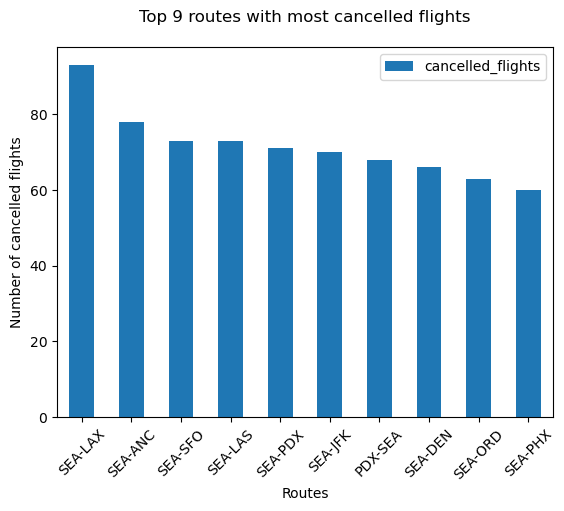

In [171]:
# Sorting data
top9_route_cancels_bar = routes_delay_cancels.sort_values('cancelled_flights', ascending=False)
top9_route_cancels_bar = top9_route_cancels_bar.iloc[0:10]

# Visualizing data using matplotlib
top9_route_cancels_bar.plot('route', 'cancelled_flights', kind = 'bar')
plt.title('Top 9 routes with most cancelled flights\n')
plt.xlabel('Routes')
plt.ylabel('Number of cancelled flights')
plt.xticks(rotation = 45)
plt.show()

Secondly, we will do the same to our `airlines_delay_cancels` data frame to answer our which airlines have the most cancellations. As observed above, we notice there are only 12 airlines in our data set. Hence, we can visualize the whole data frame without risking interpretability. 

However, to aid comprehension, we can create a horizontal bar chart instead of a conventional bar chart. This is because our conventional bar chart has the airlines on the x-axis. If we either choose to rotate the labels of the airlines 90 degrees or not, the resulting x-axis labels remain unconvenient to read. Thus, a horizontal bar chart is a better option in this situation. In doing so, I will specifically choose to sort data in the ascending order of `cancelled_flights` for better presentation.

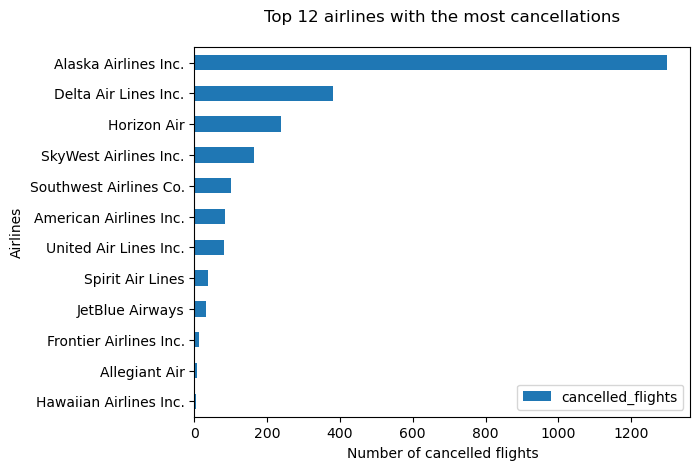

In [157]:
# Sorting data
top9_airline_cancelled_bar = airlines_delay_cancels.sort_values('cancelled_flights', ascending=True)

# Visualizing data
top9_airline_cancelled_bar.plot('airline', 'cancelled_flights', kind = 'barh')
plt.title('Top 12 airlines with the most cancellations\n')
plt.ylabel('Airlines')
plt.xlabel('Number of cancelled flights')
plt.legend(loc = 'lower right')
plt.show()

Finally, we can answer the last question by following the same procedure above.

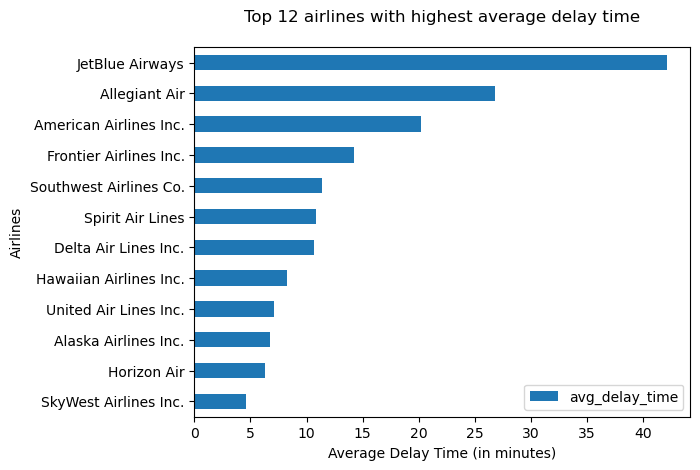

In [161]:
# Sort data
top9_airline_delays_bar = airlines_delay_cancels.sort_values('avg_delay_time', ascending=True)

# Visualize data
top9_airline_delays_bar.plot('airline', 'avg_delay_time', kind = 'barh')
plt.title('Top 12 airlines with highest average delay time\n')
plt.ylabel('Airlines')
plt.xlabel('Average Delay Time (in minutes)')
plt.show()

### 3. Evaluation

Our exploratory analysis reveals several interesting observations.

For the top ten routes with the most canceled flights, nine are from SEA airport. If we extend our analysis to the top 20 routes, we will see a similar trend: eighteen originate from SEA, while only two are from PDX. This raises concerns about why SEA cancels significantly more flights than PDX. If our goal is to minimize cancellations or investigate their causes, these findings offer us a foundational first step.

Regarding airline performance, Alaska Airlines and JetBlue Airways are respectively the two airlines with the most cancelled flights and highest average delay time. The significant gap between Alaska Airlines and other airlines indicates a potentially crucial underlying cause for these cancellations that prompts further investigation. Similarly, the substantial delay time for JetBlue Airways also suggests an ongoing issue that may require additional analysis.

Though brief, this exploratory analysis highlights key areas where necessary improvements are needed for airlines and airports. By identifying these problems early, we can attend to these issues that might otherwise go unnoticed, helping prevent costly consequences.